In [1]:
!wget https://www.dropbox.com/s/a9r3sieqbch4sad/dataset.zip?dl=0

--2024-05-06 03:42:25--  https://www.dropbox.com/s/a9r3sieqbch4sad/dataset.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.65.18, 2620:100:6020:18::a27d:4012
Connecting to www.dropbox.com (www.dropbox.com)|162.125.65.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/a9r3sieqbch4sad/dataset.zip [following]
--2024-05-06 03:42:26--  https://www.dropbox.com/s/raw/a9r3sieqbch4sad/dataset.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc9323d7ebf7fdfcb406d743087c.dl.dropboxusercontent.com/cd/0/inline/CSVpjTtiRE-EKxSUs1mpw8eWkpivDReOz0JrjtOxTWDU6xMRlcpqwIeUKRcai0S2k-wClCO4LwMpQ0QBVxSGhW2fAShLOUJ4h8z6jGTpdkju1a4WnCe0rS3fxO-oAnJVtX9k_uNee3VzBlp07ACnUQB6/file# [following]
--2024-05-06 03:42:27--  https://uc9323d7ebf7fdfcb406d743087c.dl.dropboxusercontent.com/cd/0/inline/CSVpjTtiRE-EKxSUs1mpw8eWkpivDReOz0JrjtOxTWDU6xMRlcpqwIeUKRcai0S2k-wClCO4LwMpQ0QBVxSGhW2fAShLOUJ4h

In [2]:
!unzip dataset.zip?dl=0

Streaming output truncated to the last 5000 lines.
  inflating: dataset/98/1_COM_15_1_612.jpg  
  inflating: dataset/98/1_COM_15_1_614.jpg  
  inflating: dataset/98/1_COM_16_1_617.jpg  
  inflating: dataset/98/1_com_20_3_00005.jpg  
  inflating: dataset/98/1_Com_20_3_00043.jpg  
  inflating: dataset/98/1_Com_21_3_00021.jpg  
  inflating: dataset/98/1_Com_22_3_00017.jpg  
  inflating: dataset/98/1_CTG_11_1_623.jpg  
  inflating: dataset/98/1_CTG_12_1_635.jpg  
  inflating: dataset/98/1_CTG_22_3_148.jpg  
  inflating: dataset/98/1_DHA_11_1_643.jpg  
  inflating: dataset/98/1_DHA_11_1_645.jpg  
  inflating: dataset/98/1_DHA_11_1_649.jpg  
  inflating: dataset/98/1_DHA_11_1_650.jpg  
  inflating: dataset/98/1_DHA_11_1_653.jpg  
  inflating: dataset/98/1_DHA_11_1_654.jpg  
  inflating: dataset/98/1_DHA_11_1_658.jpg  
  inflating: dataset/98/1_DHA_11_1_662.jpg  
  inflating: dataset/98/1_DHA_11_1_665.jpg  
  inflating: dataset/98/1_DHA_11_1_668.jpg  
  inflating: dataset/98/1_DHA_11_1_669.jp

In [3]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import random

In [4]:
import skimage.io
import keras.backend as K
import tensorflow as tf
from tensorflow.keras.layers.experimental.preprocessing import Rescaling
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Add, Concatenate, Input, Flatten, Dropout,BatchNormalization ,Activation, Conv2D, MaxPool2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam, SGD, RMSprop, Adagrad
from tensorflow.keras.regularizers import l2

In [5]:
gpus = tf.config.list_physical_devices('GPU')
if gpus:
  try:
    for gpu in gpus:
      tf.config.experimental.set_memory_growth(gpu, True)
    logical_gpus = tf.config.experimental.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs", len(logical_gpus), "logical GPUs")
  except RuntimeError as e:
    print(e)

print("Tf will attempt to allocate only as much GPU Memory as needed for runtime allowed")

1 Physical GPUs 1 logical GPUs
Tf will attempt to allocate only as much GPU Memory as needed for runtime allowed


In [6]:
train_datagen = ImageDataGenerator(rescale = 1./255,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        vertical_flip=True,
        fill_mode='nearest',validation_split=0.3)

valid_datagen = ImageDataGenerator(rescale = 1./255,validation_split=0.2)

test_datagen = ImageDataGenerator(rescale = 1./255,validation_split=0.1)

In [7]:
classes = os.listdir('/content/dataset')[:50]
len_class = len(classes)
n=48

In [8]:
train_dataset  = train_datagen.flow_from_directory(directory = '/content/dataset',
                                                   target_size = (n,n),
                                                   classes=classes,
                                                   class_mode = 'categorical',
                                                   batch_size = 128,
                                                   subset = 'training')


valid_dataset = valid_datagen.flow_from_directory(directory = '/content/dataset',
                                                  target_size = (n,n),
                                                  classes=classes,
                                                  class_mode = 'categorical',
                                                  batch_size = 1,
                                                  subset = 'validation')

test_dataset = test_datagen.flow_from_directory(directory = '/content/dataset',
                                                  target_size = (n,n),
                                                  classes=classes,
                                                  class_mode = 'categorical',
                                                  batch_size = 1,
                                                  subset = 'validation')

Found 107185 images belonging to 50 classes.
Found 30598 images belonging to 50 classes.
Found 15286 images belonging to 50 classes.


In [9]:
input_img = Input(shape=(n,n,3))
conv1 = Conv2D(64, kernel_size=(3, 3), strides=(2, 2), padding='same', activation='relu')(input_img)
conv2 = Conv2D(64, kernel_size=(5, 5), strides=(2, 2), padding='same', activation='relu')(conv1)
conv3 = Conv2D(64, kernel_size=(1, 1), strides=(2, 2), padding='same', activation='relu')(conv1)
conv4 = Conv2D(64, kernel_size=(5, 5), strides=(2, 2), padding='same', activation='relu')(conv1)
conv5 = Conv2D(64, kernel_size=(1, 1), strides=(2, 2), padding='same', activation='relu')(conv1)




# Accretion layer addition OF 14*14*32 of conv6+conv7 and conv8+conv9
added1 = Add()([conv2,conv3])
added2 = Add()([conv4,conv5])

# Now applying5*5 filter on all the convoluted images
#size is 14*14*32
conv6 = Conv2D(64, kernel_size=(3, 3), strides=(2, 2), padding='same', activation='relu')(conv2)
conv7 = Conv2D(64, kernel_size=(3, 3), strides=(2, 2), padding='same', activation='relu')(added1)
conv8 = Conv2D(64, kernel_size=(3, 3), strides=(2, 2), padding='same', activation='relu')(added2)
conv9 = Conv2D(64, kernel_size=(3, 3), strides=(2, 2), padding='same', activation='relu')(conv4)

#concatenate
added3 = Add()([conv6,conv9])
added4 = Add()([conv7,conv8])
concatenated_output = Concatenate()([added3,added4])

concatenated_output = BatchNormalization()(concatenated_output)
'''
conv10 = Conv2D(128, kernel_size=(3, 3), strides=(2, 2), padding='same', activation='relu')(concatenated_output)
conv11 = Conv2D(128, kernel_size=(5, 5), strides=(2, 2), padding='same', activation='relu')(concatenated_output)
added5 = Add()([conv10,conv11])
added5 = BatchNormalization()(added5)
'''
flatten = Flatten()(concatenated_output)

#fully coonnected
fully_connected_1 = Dense(512, activation='relu')(flatten)
fully_connected_2 = Dense(256, activation='relu')(fully_connected_1)
fully_connected_2 = Dropout(0.5)(fully_connected_2)
fully_connected_3 = Dense(128, activation='relu')(fully_connected_2)
output = Dense(len_class, activation='softmax')(fully_connected_2)


model = Model(inputs = input_img, outputs=output)

In [10]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 48, 48, 3)]          0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 24, 24, 64)           1792      ['input_1[0][0]']             
                                                                                                  
 conv2d_1 (Conv2D)           (None, 12, 12, 64)           102464    ['conv2d[0][0]']              
                                                                                                  
 conv2d_3 (Conv2D)           (None, 12, 12, 64)           102464    ['conv2d[0][0]']              
                                                                                              

In [11]:
learning_rate = 0.001

optimizer = Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [13]:
history=model.fit(train_dataset, validation_data=valid_dataset,epochs=30)

Epoch 1/30
838/838 [==============================] - 245s 292ms/step - loss: 1.8830 - accuracy: 0.4543 - val_loss: 0.9456 - val_accuracy: 0.7261
Epoch 2/30
838/838 [==============================] - 243s 290ms/step - loss: 1.1659 - accuracy: 0.6623 - val_loss: 0.7337 - val_accuracy: 0.7870
Epoch 3/30
838/838 [==============================] - 280s 335ms/step - loss: 0.9335 - accuracy: 0.7312 - val_loss: 0.8077 - val_accuracy: 0.7726
Epoch 4/30
838/838 [==============================] - 244s 291ms/step - loss: 0.8102 - accuracy: 0.7655 - val_loss: 0.5752 - val_accuracy: 0.8389
Epoch 5/30
838/838 [==============================] - 241s 288ms/step - loss: 0.7286 - accuracy: 0.7915 - val_loss: 0.5001 - val_accuracy: 0.8596
Epoch 6/30
838/838 [==============================] - 242s 289ms/step - loss: 0.6780 - accuracy: 0.8084 - val_loss: 0.4718 - val_accuracy: 0.8641
Epoch 7/30
838/838 [==============================] - 279s 333ms/step - loss: 0.6365 - accuracy: 0.8183 - val_loss: 0.4745 -

In [16]:
model.save_weights('ekush_multiScale.keras')

In [17]:
model.save_weights('ekush_multiScale.h5')

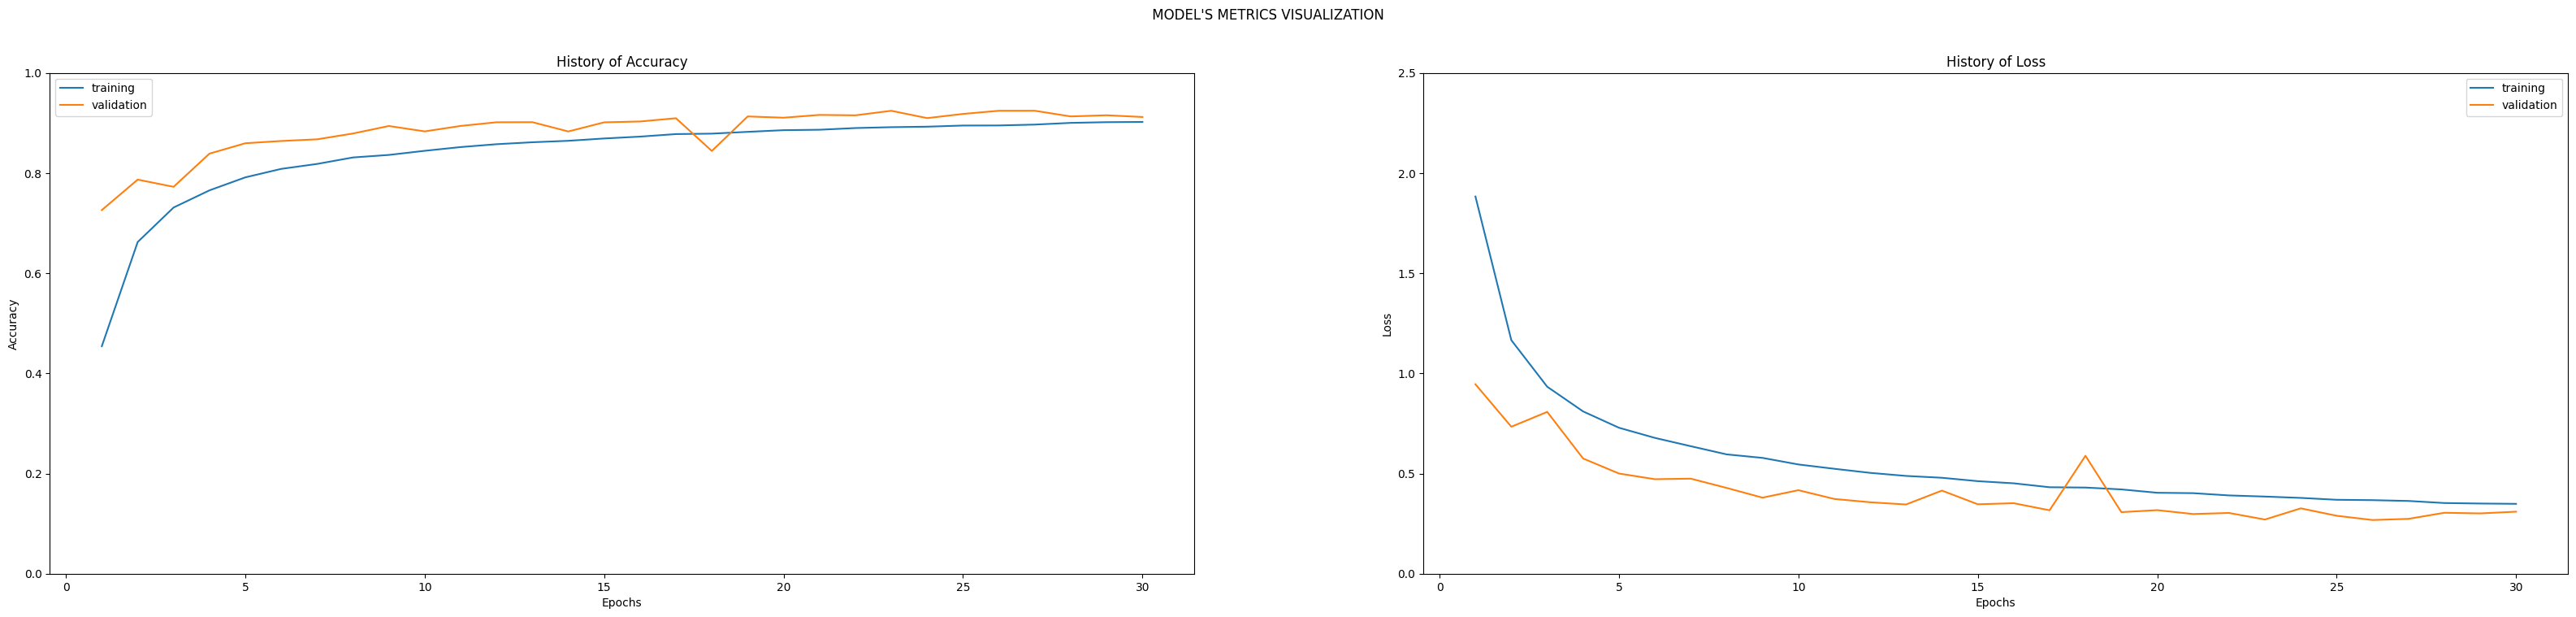

<Figure size 640x480 with 0 Axes>

In [18]:
def Train_Val_Plot(acc,val_acc,loss,val_loss):

    fig, (ax1, ax2) = plt.subplots(1,2, figsize= (40,8))
    fig.suptitle(" MODEL'S METRICS VISUALIZATION ")

    ax1.plot(range(1, len(acc) + 1), acc)
    ax1.plot(range(1, len(val_acc) + 1), val_acc)
    ax1.set_title('History of Accuracy')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Accuracy')
    ax1.set_ylim([0, 1])
    ax1.legend(['training', 'validation'])


    ax2.plot(range(1, len(loss) + 1), loss)
    ax2.plot(range(1, len(val_loss) + 1), val_loss)
    ax2.set_title('History of Loss')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Loss')
    ax2.set_ylim([0, 2.5])
    #ax2.legend(['training'])
    ax2.legend(['training', 'validation'])

    plt.show()
    plt.savefig("output.jpg")


Train_Val_Plot(history.history['accuracy'],history.history['val_accuracy'],
               history.history['loss'],history.history['val_loss']
              )

In [28]:
predictions = model.predict(test_dataset,verbose=1)

15286/15286 [==============================] - 48s 3ms/step


In [19]:
res1 = model.evaluate(train_dataset,verbose=1)
res2 = model.evaluate(valid_dataset,verbose=1)
res3 = model.evaluate(test_dataset,verbose=1)

15286/15286 [==============================] - 63s 4ms/step - loss: 0.3402 - accuracy: 0.9052


In [24]:
import numpy as np
class_index = test_dataset.classes
pred = predictions.argmax(axis=1)
print(pred)

[ 9  1 11 ... 17 23 48]
